<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [9]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
#Printing out the first 5 rows for reference
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Task 4: Generate Descriptive Statistics and Visualizations: please include a title in each graph and appropriate labels

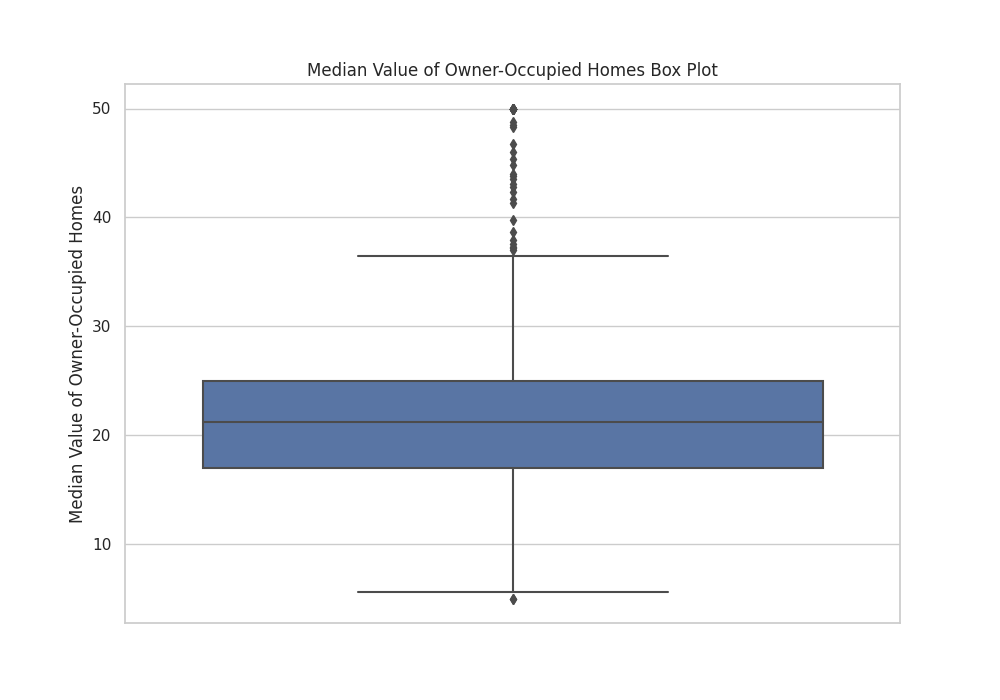

In [22]:
#For the "Median value of owner-occupied homes" provide a boxplot
boxplot_MEDV = sns.boxplot(y="MEDV", data=boston_df).set(title="Median Value of Owner-Occupied Homes Box Plot", ylabel="Median Value of Owner-Occupied Homes")
pyplot.show()
#Median value of owner-occupied homes has many outliers around at greater than 40

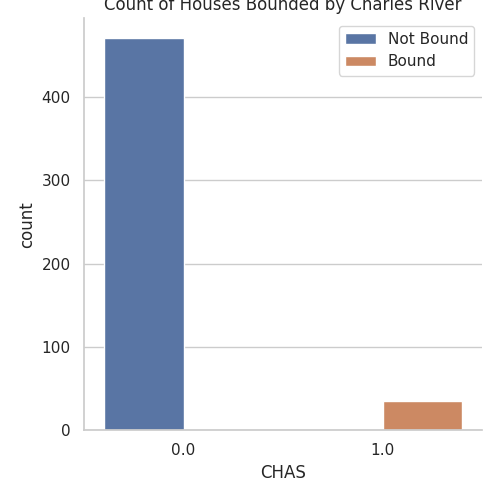

In [65]:
#Provide a bar plot for the Charles river variable
sns.set(style="whitegrid")
barplot_Charles = sns.catplot(x = "CHAS", kind="count", hue="CHAS", data=boston_df).set(title="Count of Houses Bounded by Charles River")
#barplot_Charles = sns.catplot(x="CHAS", data=boston_df).set(title="Count of Houses Bounded by Charles River")
pyplot.legend(labels=["Not Bound","Bound"])
pyplot.show()
#There are many more houses not bounded by the Charles River

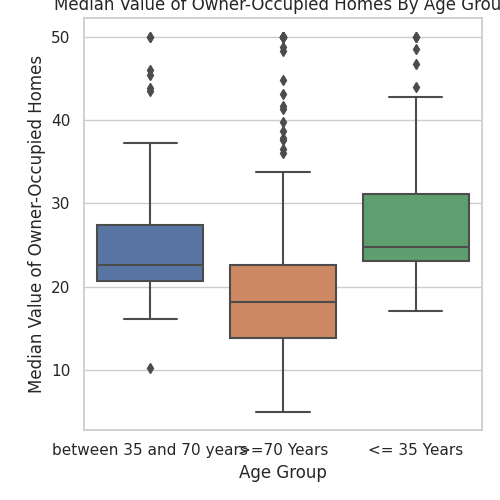

In [67]:
#Provide a boxplot of the MEDV variable vs the AGE variable (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
##Discretizing the age variable
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '<= 35 Years'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '>=70 Years'
boxplot_AGE_MEDV = sns.boxplot(x='age_group', y='MEDV', data=boston_df).set(title="Median Value of Owner-Occupied Homes By Age Group", ylabel="Median Value of Owner-Occupied Homes", xlabel="Age Group")
pyplot.show()
#Grouping the median value of owner-occupied homes by the above age groups shows that overall the highest value homes are less than
#or equal to 35 years, these are the newest homes as the homes' age is older they're more likely to have a lesser value.

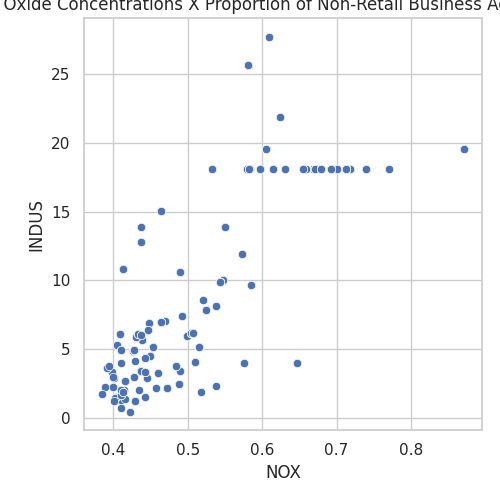

In [31]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
scatter_Nitric_NonRetail = sns.scatterplot(x='NOX', y='INDUS', data=boston_df).set(title="Nitric Oxide Concentrations X Proportion of Non-Retail Business Acres Per Town")
pyplot.show()
#The scatterplot shows us that there could be a relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

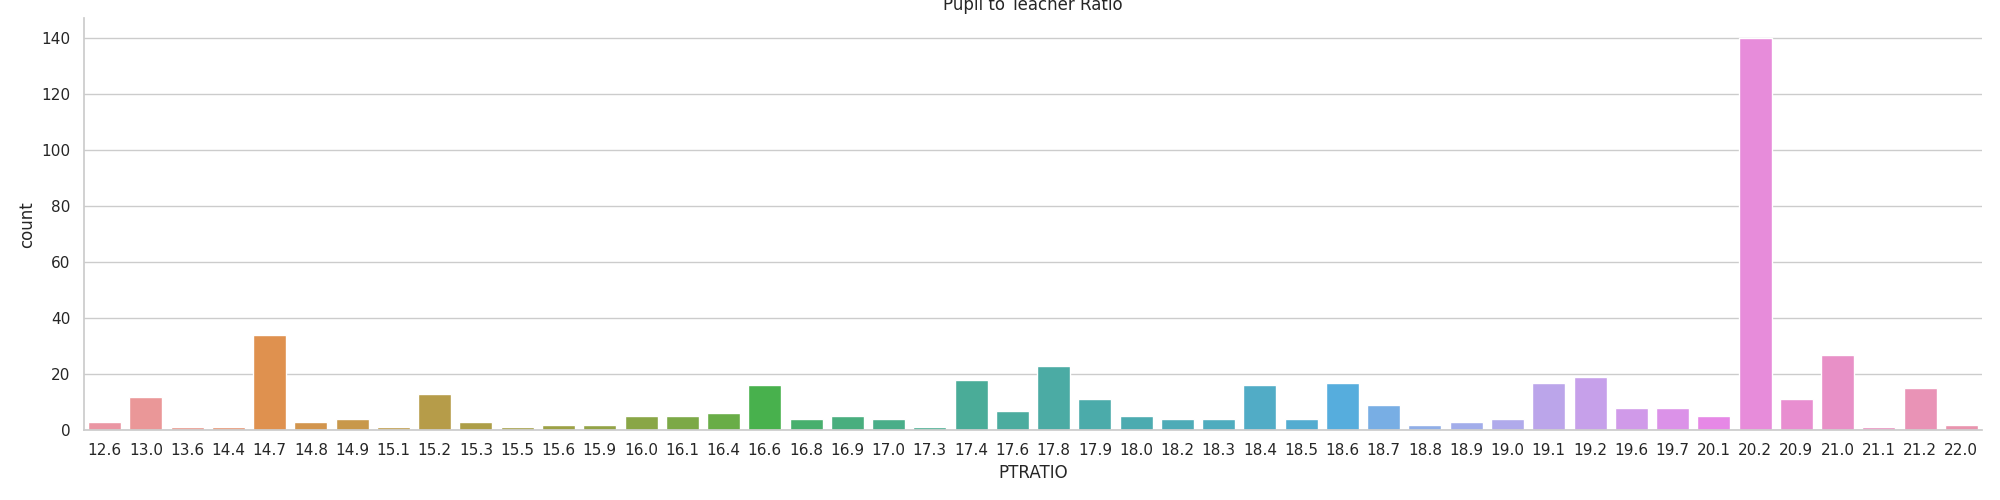

In [34]:
#Create a histogram for the pupil to teacher ratio variable
sns.catplot(x='PTRATIO', kind='count', data=boston_df, height = 5, aspect = 4).set(title="Pupil to Teacher Ratio")
pyplot.show()
#This histogram shows an outlier for the pupil to teacher ratio at 20.2, all others are pretty similar, this skews the historam to the right.

Task 5: Use the appropriate tests to answer the questions provided

In [11]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
#𝐻0:µ1=µ2 ("there is no difference in median value of houses bounded by the Charles river")
#𝐻1:µ1≠µ2 ("there is a difference in median value of houses bounded by the Charles river")
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'],  
                   center='mean')
#Output: LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                  boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)
#Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a 
#statistical difference in median value of houses bounded by the Charles River

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

In [12]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
#𝐻0:µ1=µ2=µ3 (the AGE Groups means are equal)
#𝐻1:At least one of the means differ
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '<= 35 Years'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '>=70 Years'

scipy.stats.levene(boston_df[boston_df['age_group'] == '<= 35 Years']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'],
                   boston_df[boston_df['age_group'] ==  '>=70 Years']['MEDV'],
                   center='mean')
#Output:LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)
#Since the p-value is greater than 0.05, the variance are equal
thirtyfiveLower = boston_df[boston_df['age_group'] == '<= 35 Years' ] ['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] ==  'between 35 and 70 years'] ['MEDV']
seventy_upper = boston_df[boston_df['age_group'] ==  '>=70 Years'] ['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thirtyfiveLower, thirtyfive_seventy, seventy_upper)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))
#Since the p-value is less than 0.05, we will reject the null hypothesis. There is significant evidence that at least one of the means differs.

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [14]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 
#(Pearson Correlation)
#𝐻0:Concentrations of Nitric Oxide is not correlated with the proportion of non-retail business acres per town
#𝐻1:Concentrations of Nitric Oxide is correlated with the proportion of non-retail business acres per town
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
#Output: PeasronResult(statistic=0.7636514469209151, pvalue=7.913361061238693e-98)
#sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
#Since the pvalue is less than 0.05, we reject the Null Hypothesis and conclude that there exists a relationship 
#between concentrations of Nitric Oxide and proportion of non-retail business acres per town

(0.7636514469209189, 7.913361061211254e-98)

In [15]:
#What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? 
#(Regression analysis)
#𝐻0:β1 = 0 (Distance to Boston employment centres has no effect on median value of owner occupied homes)
#𝐻1:β1 is not equal to 0 (Distance to Boston employment centres has an effect on median value of owner occupied homes)
X = boston_df['DIS']
Y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
predictions=model.predict(X)
model.summary()
#The p-valy is less than the 0.05, so we reject the null hypothesis as there is evidence that there is an impact on median value of owner
#occupied homes based on the weighted distances to the five Boston employment centers.
#The impact of an addional weighted distance to the five Boston employment centeres on the median value of owner occupied homes is 1.0916.
#This means that the the median value of owner occupied hoem is 1.0916 higher than when the weighted distance to the five Boston employment 
#centeres is closer.
#sns.scatterplot(x="DIS", y="MEDV", data=boston_df)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 27 Mar 2023   Prob (F-statistic):           1.21e-08
Time:                        08:49:12   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""